<a href="https://colab.research.google.com/github/redzuanabdullah/Test/blob/main/Applied_Text_Mining_and_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
csv_folder_path = '/content/drive/MyDrive/tweet_data.csv'

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/tweet_data.csv')


In [ ]:
df.head()

,textID,tweet_text,sentiment
0,1956967666,Layin n bed with a headache ughhhh...waitin o...,negative
1,1956967696,Funeral ceremony...gloomy friday...,negative
2,1956967789,wants to hang out with friends SOON!,positive
3,1956968477,Re-pinging @ghostridah14: why didn't you go to...,negative
4,1956968636,Hmmm. http://www.djhero.com/ is down,negative


In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/tweet_data.csv')


In [ ]:
df. sample (10)

,textID,tweet_text,sentiment
17014,1753311178,watching W. with jas. i love my brother he's m...,positive
17291,1753415554,Back from cycling 20 miles on virtually traffi...,positive
9348,1966327241,@srcasm I need to come spend some time on you...,negative
6451,1964139894,i'm gonna miss eddy if we're half the country ...,negative
7226,1964794790,Head hurts bad,negative
14187,1751644693,"@justinsxe woot, woot! super cool",positive
6900,1964592988,i wonder if there is a life after Alzheimer's ...,negative
10336,1694329574,I am now eating one of those big subway cookie...,positive
1826,1958134698,@Loulou_de_B You have to email her - she only ...,negative
10376,1694346816,@rizkyinayati heeeey good luck for unair sweet!,positive


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
sentiment_counts = df['sentiment'].value_counts()

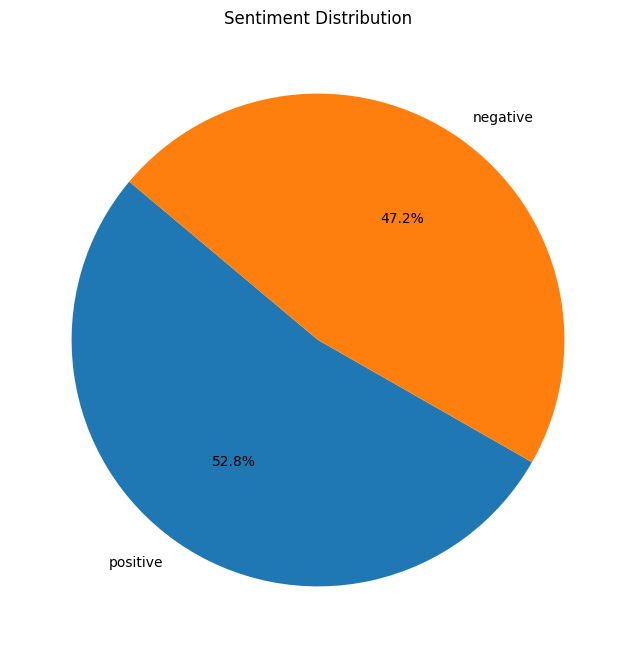

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution')
plt.show()

In [ ]:
positive_tweets = sentiment_counts.get('positive', 0)
negative_tweets = sentiment_counts.get('negative', 0)

print(f"Number of Positive Tweets: {positive_tweets}")
print(f"Number of Negative Tweets: {negative_tweets}")

Number of Positive Tweets: 9897
Number of Negative Tweets: 8830


In [ ]:
from wordcloud import WordCloud

In [ ]:
import pandas as pd
import re
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/tweet_data.csv')

# Initialize spaCy English model
nlp = spacy.load('en_core_web_sm')

# Function to clean the tweet text
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove emojis
    text = re.sub(r'[^\w\s,]', '', text)

    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)

    # Remove stop words
    text = " ".join([word for word in text.split() if word not in STOP_WORDS])

    # Remove numbers (optional)
    text = re.sub(r'\d+', '', text)

    # Trim extra whitespace
    text = text.strip()

    return text

# Apply the cleaning function to the tweet_text column
df['cleaned_tweet_text'] = df['tweet_text'].apply(clean_text)

# Display the first few rows of the cleaned dataset
df[['tweet_text', 'cleaned_tweet_text']].head()


,tweet_text,cleaned_tweet_text
0,Layin n bed with a headache ughhhh...waitin o...,layin n bed headache ughhhhwaitin
1,Funeral ceremony...gloomy friday...,funeral ceremonygloomy friday
2,wants to hang out with friends SOON!,wants hang friends soon
3,Re-pinging @ghostridah14: why didn't you go to...,repinging ghostridah didnt prom bc bf didnt li...
4,Hmmm. http://www.djhero.com/ is down,hmmm


In [ ]:
import pandas as pd
import re
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/tweet_data.csv')

# Initialize spaCy English model
nlp = spacy.load('en_core_web_sm')

# Dictionary for contractions and abbreviations
contractions_abbr = {
    "didn't": "did not",
    "don't": "do not",
    "can't": "cannot",
    "won't": "will not",
    "bc": "because",
    "bf": "before",
    "b/c": "because",
    "u": "you",
    "r": "are",
    "ur": "your",
    "y'all": "you all"
    # Add more as needed
}

# Function to clean and replace contractions/abbreviations in text
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Tokenize and replace contractions/abbreviations
    tokens = text.split()
    tokens = [contractions_abbr.get(token, token) for token in tokens]
    text = " ".join(tokens)

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove emojis
    text = re.sub(r'[^\w\s,]', '', text)

    # Remove punctuation while keeping contractions
    text = re.sub(r'[^\w\s]', '', text)

    # Remove stop words
    text = " ".join([word for word in text.split() if word not in STOP_WORDS])

    # Trim extra whitespace
    text = text.strip()

    return text

# Apply the cleaning function to the tweet_text column
df['cleaned_tweet_text'] = df['tweet_text'].apply(clean_text)

# Display the first few rows of the cleaned dataset
df[['tweet_text', 'cleaned_tweet_text']].head()


,tweet_text,cleaned_tweet_text
0,Layin n bed with a headache ughhhh...waitin o...,layin n bed headache ughhhhwaitin
1,Funeral ceremony...gloomy friday...,funeral ceremonygloomy friday
2,wants to hang out with friends SOON!,wants hang friends soon
3,Re-pinging @ghostridah14: why didn't you go to...,repinging ghostridah14 prom like friends
4,Hmmm. http://www.djhero.com/ is down,hmmm


In [ ]:
import pandas as pd
import re
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from urllib.parse import urlparse

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/tweet_data.csv')

# Initialize spaCy English model
nlp = spacy.load('en_core_web_sm')

# Dictionary for contractions and abbreviations
contractions_abbr = {
    "didn't": "did not",
    "don't": "do not",
    "can't": "cannot",
    "won't": "will not",
    "bc": "because",
    "bf": "before",
    "b/c": "because",
    "u": "you",
    "r": "are",
    "ur": "your",
    "y'all": "you all"
    # Add more as needed
}

# Function to extract domain from URL
def extract_domain(url):
    try:
        domain = urlparse(url).netloc
        return domain.split('.')[0]  # Get the main part of the domain
    except:
        return ''

# Function to clean and replace contractions/abbreviations in text
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Extract and keep the domain from URLs
    urls = re.findall(r'http\S+|www\S+|https\S+', text)
    domains = [extract_domain(url) for url in urls]
    text += " " + " ".join(domains)

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Tokenize and replace contractions/abbreviations
    tokens = text.split()
    tokens = [contractions_abbr.get(token, token) for token in tokens]
    text = " ".join(tokens)

    # Remove emojis
    text = re.sub(r'[^\w\s,]', '', text)

    # Remove punctuation while keeping contractions
    text = re.sub(r'[^\w\s]', '', text)

    # Remove stop words
    text = " ".join([word for word in text.split() if word not in STOP_WORDS])

    # Trim extra whitespace
    text = text.strip()

    return text

# Apply the cleaning function to the tweet_text column
df['cleaned_tweet_text'] = df['tweet_text'].apply(clean_text)

# Display the first few rows of the cleaned dataset
df[['tweet_text', 'cleaned_tweet_text']].head()


,tweet_text,cleaned_tweet_text
0,Layin n bed with a headache ughhhh...waitin o...,layin n bed headache ughhhhwaitin
1,Funeral ceremony...gloomy friday...,funeral ceremonygloomy friday
2,wants to hang out with friends SOON!,wants hang friends soon
3,Re-pinging @ghostridah14: why didn't you go to...,repinging ghostridah14 prom like friends
4,Hmmm. http://www.djhero.com/ is down,hmmm www


In [ ]:
import pandas as pd
import re
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from urllib.parse import urlparse

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/tweet_data.csv')

# Initialize spaCy English model
nlp = spacy.load('en_core_web_sm')

# Dictionary for contractions and abbreviations
contractions_abbr = {
    "didn't": "did not",
    "don't": "do not",
    "can't": "cannot",
    "won't": "will not",
    "bc": "because",
    "bf": "before",
    "b/c": "because",
    "u": "you",
    "r": "are",
    "ur": "your",
    "y'all": "you all"
    # Add more as needed
}

# Function to extract domain from URL
def extract_domain(url):
    try:
        domain = urlparse(url).netloc
        return domain.split('.')[0]  # Get the main part of the domain
    except:
        return ''

# Function to clean and replace contractions/abbreviations in text
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Extract and keep the domain from URLs
    urls = re.findall(r'http\S+|www\S+|https\S+', text)
    domains = [extract_domain(url) for url in urls]
    text += " " + " ".join(domains)

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Tokenize and replace contractions/abbreviations
    tokens = text.split()
    tokens = [contractions_abbr.get(token, token) for token in tokens]
    text = " ".join(tokens)

    # Remove emojis
    text = re.sub(r'[^\w\s,]', '', text)

    # Remove punctuation while keeping contractions
    text = re.sub(r'[^\w\s]', '', text)

    # Remove stop words
    text = " ".join([word for word in text.split() if word not in STOP_WORDS])

    # Trim extra whitespace
    text = text.strip()

    return text

# Apply the cleaning function to the tweet_text column
df['cleaned_tweet_text'] = df['tweet_text'].apply(clean_text)

# Display the first few rows of the cleaned dataset
df[['tweet_text', 'cleaned_tweet_text']].head()


,tweet_text,cleaned_tweet_text
0,Layin n bed with a headache ughhhh...waitin o...,layin n bed headache ughhhhwaitin
1,Funeral ceremony...gloomy friday...,funeral ceremonygloomy friday
2,wants to hang out with friends SOON!,wants hang friends soon
3,Re-pinging @ghostridah14: why didn't you go to...,repinging ghostridah14 prom like friends
4,Hmmm. http://www.djhero.com/ is down,hmmm www


In [ ]:
pip install scikit-learn

In [ ]:
import pandas as pd

# Function to tokenize the cleaned text
def tokenize_text(text):
    # Tokenize the text (split into words)
    tokens = text.split()

    # Return the tokens
    return tokens

# Apply the tokenization function to the cleaned_tweet_text column
df['tokenized_text'] = df['cleaned_tweet_text'].apply(tokenize_text)

# Display the first few rows of the tokenized dataset
df[['cleaned_tweet_text', 'tokenized_text']].head()


,cleaned_tweet_text,tokenized_text
0,layin n bed headache ughhhhwaitin,"[layin, n, bed, headache, ughhhhwaitin]"
1,funeral ceremonygloomy friday,"[funeral, ceremonygloomy, friday]"
2,wants hang friends soon,"[wants, hang, friends, soon]"
3,repinging ghostridah14 prom like friends,"[repinging, ghostridah14, prom, like, friends]"
4,hmmm www,"[hmmm, www]"


In [ ]:
import pandas as pd

# Function to tokenize the cleaned text
def tokenize_text(text):
    # Tokenize the text (split into words)
    tokens = text.split()

    # Return the tokens
    return tokens

# Apply the tokenization function to the cleaned_tweet_text column
df['tokenized_text'] = df['cleaned_tweet_text'].apply(tokenize_text)

# Display the first few rows of the tokenized dataset along with sentiment
df[['cleaned_tweet_text', 'tokenized_text', 'sentiment']].head()


,cleaned_tweet_text,tokenized_text,sentiment
0,layin n bed headache ughhhhwaitin,"[layin, n, bed, headache, ughhhhwaitin]",negative
1,funeral ceremonygloomy friday,"[funeral, ceremonygloomy, friday]",negative
2,wants hang friends soon,"[wants, hang, friends, soon]",positive
3,repinging ghostridah14 prom like friends,"[repinging, ghostridah14, prom, like, friends]",negative
4,hmmm www,"[hmmm, www]",negative


In [ ]:
# Print the existing columns in the DataFrame
print(df.columns)


Index(['textID', 'tweet_text', 'sentiment', 'cleaned_tweet_text',
       'tokenized_text'],
      dtype='object')


In [ ]:
# Function to convert sentiment to binary
def sentiment_to_binary(sentiment):
    if sentiment == 'positive':
        return 1
    elif sentiment == 'negative':
        return 0

# Apply the function to create the binary_sentiment column
df['binary_sentiment'] = df['sentiment'].apply(sentiment_to_binary)

# Display the first few rows of the DataFrame with the new binary_sentiment column
df[['sentiment', 'binary_sentiment']].head()


,sentiment,binary_sentiment
0,negative,0
1,negative,0
2,positive,1
3,negative,0
4,negative,0


In [ ]:
# Display the first 10 rows of the DataFrame
df[['sentiment', 'binary_sentiment']].head(10)


,sentiment,binary_sentiment
0,negative,0
1,negative,0
2,positive,1
3,negative,0
4,negative,0
5,negative,0
6,negative,0
7,negative,0
8,negative,0
9,negative,0


In [ ]:
df.head(10)

,textID,tweet_text,sentiment,cleaned_tweet_text,tokenized_text,binary_sentiment
0,1956967666,Layin n bed with a headache ughhhh...waitin o...,negative,layin n bed headache ughhhhwaitin,"[layin, n, bed, headache, ughhhhwaitin]",0
1,1956967696,Funeral ceremony...gloomy friday...,negative,funeral ceremonygloomy friday,"[funeral, ceremonygloomy, friday]",0
2,1956967789,wants to hang out with friends SOON!,positive,wants hang friends soon,"[wants, hang, friends, soon]",1
3,1956968477,Re-pinging @ghostridah14: why didn't you go to...,negative,repinging ghostridah14 prom like friends,"[repinging, ghostridah14, prom, like, friends]",0
4,1956968636,Hmmm. http://www.djhero.com/ is down,negative,hmmm www,"[hmmm, www]",0
5,1956969035,@charviray Charlene my love. I miss you,negative,charviray charlene love miss,"[charviray, charlene, love, miss]",0
6,1956969172,@kelcouch I'm sorry at least it's Friday?,negative,kelcouch im sorry friday,"[kelcouch, im, sorry, friday]",0
7,1956969531,Choked on her retainers,negative,choked retainers,"[choked, retainers]",0
8,1956970047,Ugh! I have to beat this stupid song to get to...,negative,ugh beat stupid song rude,"[ugh, beat, stupid, song, rude]",0
9,1956970424,@BrodyJenner if u watch the hills in london u ...,negative,brodyjenner watch hills london realise tourtur...,"[brodyjenner, watch, hills, london, realise, t...",0


In [ ]:
# Print the existing columns in the DataFrame
print(df.columns)


Index(['textID', 'tweet_text', 'sentiment', 'cleaned_tweet_text',
       'tokenized_text', 'binary_sentiment'],
      dtype='object')


In [ ]:
# Assuming you have a text column to clean
df['cleaned_tweet_text'] = df['tweet_text'].apply(lambda x: x.lower())  # Example cleaning step


In [ ]:
# Assuming 'cleaned_tweet_text' exists
df['tokenized_text'] = df['cleaned_tweet_text'].apply(lambda x: x.split())


In [ ]:
df[['cleaned_tweet_text', 'tokenized_text', 'sentiment', 'binary_sentiment']].head(10)


,cleaned_tweet_text,tokenized_text,sentiment,binary_sentiment
0,layin n bed with a headache ughhhh...waitin o...,"[layin, n, bed, with, a, headache, ughhhh...wa...",negative,0
1,funeral ceremony...gloomy friday...,"[funeral, ceremony...gloomy, friday...]",negative,0
2,wants to hang out with friends soon!,"[wants, to, hang, out, with, friends, soon!]",positive,1
3,re-pinging @ghostridah14: why didn't you go to...,"[re-pinging, @ghostridah14:, why, didn't, you,...",negative,0
4,hmmm. http://www.djhero.com/ is down,"[hmmm., http://www.djhero.com/, is, down]",negative,0
5,@charviray charlene my love. i miss you,"[@charviray, charlene, my, love., i, miss, you]",negative,0
6,@kelcouch i'm sorry at least it's friday?,"[@kelcouch, i'm, sorry, at, least, it's, friday?]",negative,0
7,choked on her retainers,"[choked, on, her, retainers]",negative,0
8,ugh! i have to beat this stupid song to get to...,"[ugh!, i, have, to, beat, this, stupid, song, ...",negative,0
9,@brodyjenner if u watch the hills in london u ...,"[@brodyjenner, if, u, watch, the, hills, in, l...",negative,0


In [ ]:
from collections import Counter

# Flatten the list of tokens into a single list
all_tokens = [token for sublist in df['tokenized_text'] for token in sublist]

# Count the frequency of each token
token_counts = Counter(all_tokens)


In [ ]:
# Display the 10 most common tokens
most_common_tokens = token_counts.most_common(10)
print("Most common tokens:")
for token, count in most_common_tokens:
    print(f"{token}: {count}")


Most common tokens:
i: 9336
to: 6557
the: 6119
a: 4707
my: 3960
and: 3606
you: 2978
is: 2722
for: 2492
in: 2401


In [ ]:
from spacy.lang.en.stop_words import STOP_WORDS

# Remove stop words from the tokenized text
df['filtered_tokens'] = df['tokenized_text'].apply(lambda tokens: [token for token in tokens if token not in STOP_WORDS])


In [ ]:
# Flatten the filtered list of tokens into a single list
filtered_tokens = [token for sublist in df['filtered_tokens'] for token in sublist]

# Count the frequency of each token
filtered_token_counts = Counter(filtered_tokens)

# Display the 10 most common tokens
most_common_filtered_tokens = filtered_token_counts.most_common(10)
print("Most common tokens after removing stop words:")
for token, count in most_common_filtered_tokens:
    print(f"{token}: {count}")


Most common tokens after removing stop words:
i'm: 1594
day: 1261
good: 1247
love: 1013
happy: 1000
like: 967
it's: 818
-: 813
got: 705
going: 681


In [ ]:
# Function to clean and tokenize text while removing specific unwanted tokens
def clean_and_tokenize_text_v2(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)  # Remove URLs
    text = re.findall(r'\b\w+\b', text)  # Tokenize and remove punctuation
    text = [contractions_abbr.get(token, token) for token in text]  # Replace contractions/abbreviations
    text = [token for token in text if token not in STOP_WORDS and token != '-']  # Remove stop words and specific unwanted tokens
    return text

# Apply the updated cleaning and tokenization function
df['filtered_tokens'] = df['tweet_text'].apply(clean_and_tokenize_text_v2)

# Re-analyze token frequencies
filtered_tokens = [token for sublist in df['filtered_tokens'] for token in sublist]
filtered_token_counts = Counter(filtered_tokens)

# Display the 10 most common tokens after further cleaning
most_common_filtered_tokens = filtered_token_counts.most_common(10)
print("Most common tokens after further cleaning:")
for token, count in most_common_filtered_tokens:
    print(f"{token}: {count}")


Most common tokens after further cleaning:
s: 2715
t: 2151
day: 1831
m: 1699
good: 1481
love: 1084
happy: 1073
like: 1004
quot: 823
today: 778


In [ ]:
df[['cleaned_tweet_text', 'tokenized_text', 'sentiment', 'binary_sentiment']].head(10)

,cleaned_tweet_text,tokenized_text,sentiment,binary_sentiment
0,layin n bed with a headache ughhhh...waitin o...,"[layin, n, bed, with, a, headache, ughhhh...wa...",negative,0
1,funeral ceremony...gloomy friday...,"[funeral, ceremony...gloomy, friday...]",negative,0
2,wants to hang out with friends soon!,"[wants, to, hang, out, with, friends, soon!]",positive,1
3,re-pinging @ghostridah14: why didn't you go to...,"[re-pinging, @ghostridah14:, why, didn't, you,...",negative,0
4,hmmm. http://www.djhero.com/ is down,"[hmmm., http://www.djhero.com/, is, down]",negative,0
5,@charviray charlene my love. i miss you,"[@charviray, charlene, my, love., i, miss, you]",negative,0
6,@kelcouch i'm sorry at least it's friday?,"[@kelcouch, i'm, sorry, at, least, it's, friday?]",negative,0
7,choked on her retainers,"[choked, on, her, retainers]",negative,0
8,ugh! i have to beat this stupid song to get to...,"[ugh!, i, have, to, beat, this, stupid, song, ...",negative,0
9,@brodyjenner if u watch the hills in london u ...,"[@brodyjenner, if, u, watch, the, hills, in, l...",negative,0


Building a frequency disctionary for positive and negative tweets

In [ ]:
# Separate the DataFrame into positive and negative tweets
positive_tweets = df[df['sentiment'] == 'positive']
negative_tweets = df[df['sentiment'] == 'negative']


In [ ]:
from collections import Counter

# Build frequency dictionary for positive tweets
positive_tokens = [token for sublist in positive_tweets['filtered_tokens'] for token in sublist]
positive_freq_dict = Counter(positive_tokens)

# Build frequency dictionary for negative tweets
negative_tokens = [token for sublist in negative_tweets['filtered_tokens'] for token in sublist]
negative_freq_dict = Counter(negative_tokens)


In [ ]:
# Display the most common tokens in positive tweets
print("Most common tokens in positive tweets:")
for token, count in positive_freq_dict.most_common(10):
    print(f"{token}: {count}")

# Display the most common tokens in negative tweets
print("\nMost common tokens in negative tweets:")
for token, count in negative_freq_dict.most_common(10):
    print(f"{token}: {count}")


Most common tokens in positive tweets:
s: 1628
day: 1464
good: 1233
love: 1030
happy: 1022
t: 723
thanks: 682
m: 666
great: 541
quot: 506

Most common tokens in negative tweets:
t: 1428
s: 1087
m: 1033
like: 535
miss: 490
work: 455
sad: 454
im: 418
sorry: 396
don: 384


In [ ]:
df[['cleaned_tweet_text', 'tokenized_text', 'sentiment', 'binary_sentiment']].head(10)

,cleaned_tweet_text,tokenized_text,sentiment,binary_sentiment
0,layin n bed with a headache ughhhh...waitin o...,"[layin, n, bed, with, a, headache, ughhhh...wa...",negative,0
1,funeral ceremony...gloomy friday...,"[funeral, ceremony...gloomy, friday...]",negative,0
2,wants to hang out with friends soon!,"[wants, to, hang, out, with, friends, soon!]",positive,1
3,re-pinging @ghostridah14: why didn't you go to...,"[re-pinging, @ghostridah14:, why, didn't, you,...",negative,0
4,hmmm. http://www.djhero.com/ is down,"[hmmm., http://www.djhero.com/, is, down]",negative,0
5,@charviray charlene my love. i miss you,"[@charviray, charlene, my, love., i, miss, you]",negative,0
6,@kelcouch i'm sorry at least it's friday?,"[@kelcouch, i'm, sorry, at, least, it's, friday?]",negative,0
7,choked on her retainers,"[choked, on, her, retainers]",negative,0
8,ugh! i have to beat this stupid song to get to...,"[ugh!, i, have, to, beat, this, stupid, song, ...",negative,0
9,@brodyjenner if u watch the hills in london u ...,"[@brodyjenner, if, u, watch, the, hills, in, l...",negative,0


Starting logistic regression, which is sutiable for sentiment analysis. Quick note -- Logistic regression is a way to predict (the ouput) the chance or probability that something will happen based on some information you already have.In logistic regression, this output is a probability between 0 and 1. A probability closer to 1 means something is more likely to happen, and closer to 0 means it’s less likely. This involves (1) splitting the data into training and testing sets (2) train the logistic regression model (3) make predictions (4) evaluate the model (5) interpret the results

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
csv_folder_path = '/content/drive/MyDrive/tweet_data.csv'

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/tweet_data.csv')

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [ ]:
csv_folder_path = '/content/drive/MyDrive/tweet_data.csv'
data = pd.read_csv(csv_folder_path)


In [ ]:
print(data.columns)
print(data.head())


Index(['textID', 'tweet_text', 'sentiment'], dtype='object')
       textID                                         tweet_text sentiment
0  1956967666  Layin n bed with a headache  ughhhh...waitin o...  negative
1  1956967696                Funeral ceremony...gloomy friday...  negative
2  1956967789               wants to hang out with friends SOON!  positive
3  1956968477  Re-pinging @ghostridah14: why didn't you go to...  negative
4  1956968636               Hmmm. http://www.djhero.com/ is down  negative


In [ ]:
X = data['tweet_text']  # Replace 'tweet_text' with the correct column name
y = data['sentiment']   # Replace 'sentiment' with the correct column name


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
model = LogisticRegression(max_iter=200)  # Increase the max_iter to 200 or more
model.fit(X_train, y_train)


LogisticRegression(max_iter=200)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=200)
model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=200)

In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Optional: Detailed classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.7309129738387613


NameError: name 'classification_report' is not defined

In [ ]:
from sklearn.metrics import classification_report


In [ ]:
# Optional: Detailed classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    negative       0.65      0.94      0.77      1773
    positive       0.91      0.54      0.68      1973

    accuracy                           0.73      3746
   macro avg       0.78      0.74      0.72      3746
weighted avg       0.79      0.73      0.72      3746



**Precision:** Think of precision like being picky. If you predict that something is positive, how often are you right? High precision means that when you say a tweet is positive, you're usually correct.
**Recall:** This is about how good you are at finding all the positive tweets. High recall means you correctly found most of the positive tweets out of all that actually exist.
**F1-Score:** This is a balance between precision and recall. It’s like an overall score that tells you how good your predictions are, taking both precision and recall into account.
**Support:** This is just the number of actual cases for each class. For example, there were 1,773 negative tweets and 1,973 positive tweets in your test set.

For **negative** tweets - when the model predicted a tweet was negative, it was 65% correct of the time. In terms of recall, the model correctly identified 94% of all the negative tweets in the dataset. For **positive** tweets, precision was (0.91) - which means when the model predicted a positive tweet it was correct 91% of the time.In terms of recall, for positive tweets, this was (0.54). That means the model correctly identified 54% of all the positive tweets. This **recall is lower THAN the negative tweets earlier**, meaning the model misssed quite a few positive tweets. In terms of Accuracy (0.73), overall the model got 73% of all tweets right, whether they were positive OR negative. **In CONCLUSION**, the model is really good at spotting negative tweets (high recall) but is less accurate in identifying positive tweets (lower recall).

Ways to improve the logistic regression model can involce several strategies. (1) feature engineering - add more features, such as the length of the tweet, the number of exclaimation points, use diffferent text representations, instead of using 'CountVectorises' try 'TF-IDF Vectoriser', (2) data cleaning and prepsocessing - refine them. (3) Model parameters tuning (4) Balance the dataset (5) Try other Models - sometimes logistic regression might not be the best model for your data, tyring more complex models like Random Forest, Support Vector Machines (SVM) or Gradient Boosting might yield better results. Try using Ensemble methods that is combing Logistic Regression and Random Forest to improve overall accuracy.

Visualizing the results

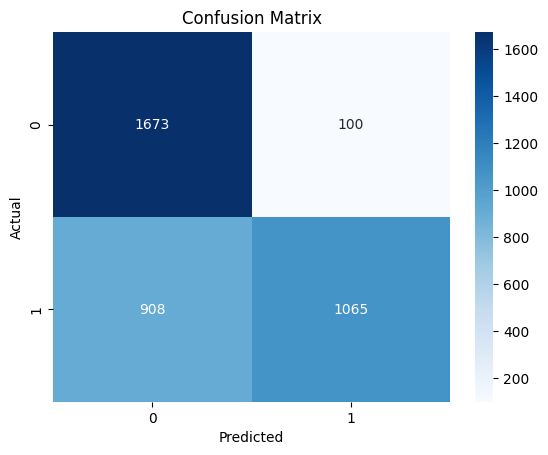

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


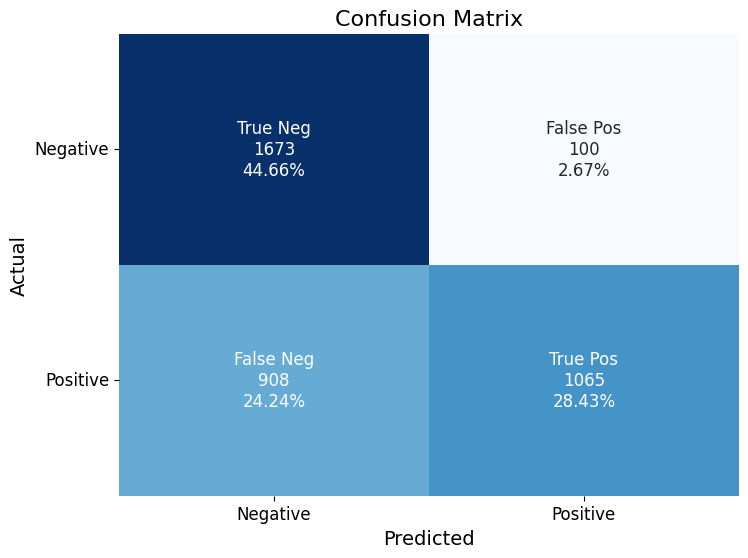

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are already defined

# Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# Define group names
group_names = ['True Neg','False Pos','False Neg','True Pos']

# Get group counts and percentages
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

# Combine group names, counts, and percentages into labels
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Plot the confusion matrix with the custom labels
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', cbar=False, annot_kws={"size": 12})

# Set axis labels and title
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.xticks(np.arange(2) + 0.5, ['Negative', 'Positive'], fontsize=12)
plt.yticks(np.arange(2) + 0.5, ['Negative', 'Positive'], fontsize=12, rotation=0)

plt.show()


Here's how to interpret the confusion matrix from your tweet dataset: TOP LEFT is TRUE NEGATIVE | TOP RIGHT is FALSE POSITIVE | BOTTOM LEFT is FALSE NEGATIVE | BOTTOM RIGHT is TRUE POSITIVES

**Confusion Matrix Overview:**
Actual Values (Rows): The true labels of the data.
0: Negative tweets.
1: Positive tweets.
Predicted Values (Columns): The labels predicted by your model.
0: Predicted as negative.
1: Predicted as positive.
The Matrix Details:
Top Left (1673):

True Negatives (TN): Your model correctly predicted 1,673 negative tweets as negative. This is a correct prediction.
Top Right (100):

False Positives (FP): Your model incorrectly predicted 100 negative tweets as positive. This is an incorrect prediction where the model wrongly classified negative tweets as positive.
Bottom Left (908):

False Negatives (FN): Your model incorrectly predicted 908 positive tweets as negative. This is an incorrect prediction where the model missed positive tweets, classifying them as negative.
Bottom Right (1065):

True Positives (TP): Your model correctly predicted 1,065 positive tweets as positive. This is a correct prediction.
What This Tells Us:
Strengths:

The model is quite good at identifying negative tweets correctly (True Negatives = 1,673).
It also correctly identifies a significant number of positive tweets (True Positives = 1,065).
Weaknesses:

The model has some trouble with false negatives, where it misses positive tweets and incorrectly labels them as negative (False Negatives = 908). This suggests that the model might be overly conservative in predicting positive tweets.
There are fewer false positives (100), which means the model doesn't often mistake negative tweets for positive ones.
Overall:
Accuracy: The model has a decent overall performance, but it could benefit from improvements in reducing false negatives (correctly identifying more positive tweets).
Precision and Recall: The high number of true negatives (1,673) and true positives (1,065) suggests that the model has good precision, but the recall might be lower for positive tweets due to the relatively high number of false negatives.

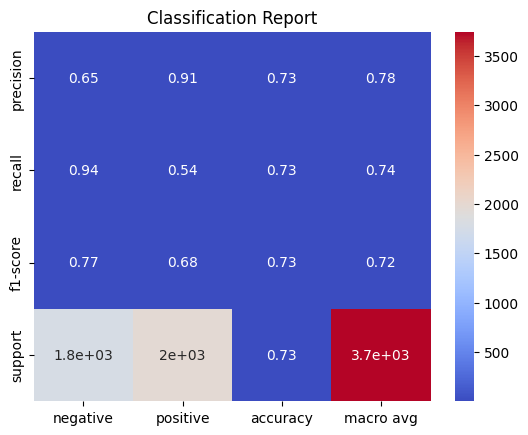

In [ ]:
from sklearn.metrics import classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Generate classification report
report = classification_report(y_test, y_pred, output_dict=True)
df = pd.DataFrame(report).transpose()

# Plot classification report
sns.heatmap(df.iloc[:-1, :].T, annot=True, cmap='coolwarm')
plt.title('Classification Report')
plt.show()
